A different approach; completly unnecessary one.

One year: train 2017
One year: validation 2018
One year: test 2019

# Imports

In [0]:
from __future__ import print_function, absolute_import, division

# general imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data read
import pandas as pd

# plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# json and pretty print
import json
import pprint

# to persist the numpy arrays data
import h5py

# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# check if correct place
!ls '/content/gdrive/My Drive/deep_learning/_data/forex/minutely/'

 EURUSD_M1_2013.csv   EURUSD_M1_2017.csv	   EURUSD_M1_201901.csv
 EURUSD_M1_2014.csv  'EURUSD_M1_2018 (1).gsheet'   EURUSD_M1_201902.csv
 EURUSD_M1_2015.csv   EURUSD_M1_2018.csv
 EURUSD_M1_2016.csv   EURUSD_M1_2018.gsheet


# Data

In [0]:
# initialize file names
data_folder = "/content/gdrive/My Drive/deep_learning/_data/forex/minutely/"
data_filenames = []
data_filenames.append("EURUSD_M1_2016.csv")
data_filenames.append("EURUSD_M1_2017.csv")
data_filenames.append("EURUSD_M1_2018.csv")

In [0]:
# get train data that will be both validation and train data in training mode
data_1 = pd.read_csv(data_folder+data_filenames[0], header=None)
data_2 = pd.read_csv(data_folder+data_filenames[1], header=None)
data_3 = pd.read_csv(data_folder+data_filenames[2], header=None)

# Get all data as list
data_list = [data_1, data_2, data_3]

## Data Functions

In [0]:
# Tries to concatenate a list of arrays into one array
def get_concatenated_dataset(d_list):
  result_data = d_list[0]
  for d in d_list[1:]:
    result_data = np.concatenate((result_data, d), axis=None)
    
  return result_data

# Tries to check if the concatenated list is correct.
def concatenate_length_check(d_list, concatenated):
  print("----------- length check -----------")
  total_length = 0
  for d in d_list:  
    total_length += len(d)
    print("length: " +str(len(d)))

  print("concatenated length "+str(len(concatenated)))
  if(len(concatenated) == total_length):
    print("concatenated length -----------> CORRECT")
  else:
    print("concatenated length -----------> WRONG")

## Train data(and validation)

In [0]:
# Get OPEN, HIGH, LOW, CLOSE columns in all data
open_data_list=[]
high_data_list=[]
low_data_list=[]
close_data_list=[]

for d in data_list:
  open_data_list.append(d[2].as_matrix())
  high_data_list.append(d[3].as_matrix())
  low_data_list.append(d[4].as_matrix())
  close_data_list.append(d[5].as_matrix())
  
# And CONCATENATE all of them
all_open_data = get_concatenated_dataset(open_data_list)
all_high_data = get_concatenated_dataset(high_data_list)
all_low_data = get_concatenated_dataset(low_data_list)
all_close_data = get_concatenated_dataset(close_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(open_data_list, all_open_data)
concatenate_length_check(high_data_list, all_high_data)
concatenate_length_check(low_data_list, all_low_data)
concatenate_length_check(close_data_list, all_close_data)

----------- length check -----------
length: 372679
length: 371635
length: 372607
concatenated length 1116921
concatenated length -----------> CORRECT
----------- length check -----------
length: 372679
length: 371635
length: 372607
concatenated length 1116921
concatenated length -----------> CORRECT
----------- length check -----------
length: 372679
length: 371635
length: 372607
concatenated length 1116921
concatenated length -----------> CORRECT
----------- length check -----------
length: 372679
length: 371635
length: 372607
concatenated length 1116921
concatenated length -----------> CORRECT


## Test data

In [0]:
# Train Data Has been gathered.
# Now Get Test data


raw_test_data_filename = "EURUSD_M1_201901.csv"
raw_test_data_1 = pd.read_csv(data_folder+raw_test_data_filename, header=None)
#raw_test_data_1 = raw_test_data_1[5].as_matrix()#get CLOSE column

raw_test_data_filename = "EURUSD_M1_201902.csv"
raw_test_data_2 = pd.read_csv(data_folder+raw_test_data_filename, header=None)
#raw_test_data_2 = raw_test_data_2[5].as_matrix()#get only CLOSE column

d_list = [raw_test_data_1, raw_test_data_2]

open_test_data_list=[]
high_test_data_list=[]
low_test_data_list=[]
close_test_data_list=[]

for d in d_list:
  open_test_data_list.append(d[2].as_matrix())
  high_test_data_list.append(d[3].as_matrix())
  low_test_data_list.append(d[4].as_matrix())
  close_test_data_list.append(d[5].as_matrix())
  
# And CONCATENATE test of them
test_open_data = get_concatenated_dataset(open_test_data_list)
test_high_data = get_concatenated_dataset(high_test_data_list)
test_low_data = get_concatenated_dataset(low_test_data_list)
test_close_data = get_concatenated_dataset(close_test_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(open_test_data_list, test_open_data)
concatenate_length_check(high_test_data_list, test_high_data)
concatenate_length_check(low_test_data_list, test_low_data)
concatenate_length_check(close_test_data_list, test_close_data)

----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT
----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT
----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT
----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT


# General Values

In [0]:
# How many of the past points were involved.
WINDOW = 60

# How many of data type is used as multivariate(open,high,low,close = 4)
EMB_SIZE = 4

# While training how many points should be ignored
STEP = 1

# Determines which time should be predictied
#(1 = 1 min further is predicted)
#(60 = 1 hour further is predicted)
FORECAST = 30

# Determines if the data is to be load.
LOAD = True

# Construct Data

## Functions

In [0]:
def get_data_chunks(d_list, length, window=30, forecast=1, step=1):
  X = []
  Y = []
  for i in range(0, length, step):
    try:
      # Get windowed data
      o = d_list[0][i:i+WINDOW] # open
      h = d_list[1][i:i+WINDOW] # high
      l = d_list[2][i:i+WINDOW] # low
      c = d_list[3][i:i+WINDOW] # close

      # Normalize data
      o = (np.array(o) - np.mean(o)) / np.std(o)
      h = (np.array(h) - np.mean(h)) / np.std(h)
      l = (np.array(l) - np.mean(l)) / np.std(l)
      c = (np.array(c) - np.mean(c)) / np.std(c)

      # x_i
      x_i = d_list[3][i:i+WINDOW]
      y_i = d_list[3][i+WINDOW+FORECAST]

      last_close = x_i[-1]
      next_close = y_i
      if last_close < next_close:
        y_i = [1, 0]
      else:
        y_i = [0, 1]

      x_i = np.column_stack((o,h,l,c))
    except Exception as e:
      print(e)
      # break when the limit is not enough
      break

    X.append(x_i)
    Y.append(y_i)
  print("data chunks are ready...")
  return [X, Y]

def get_train_validation(X, y, percentage=0.8):
    iXPercentage = int(len(X) * percentage) 
    iYPercentage = int(len(y) * percentage)
    X_train = X[0:iXPercentage]
    Y_train = y[0:iYPercentage]
    
    #X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_test = X[iXPercentage:]
    Y_test = y[iYPercentage:]

    return X_train, X_test, Y_train, Y_test

## Hand Construction

In [0]:
def save_data(x,y,x_test,y_test):
  # Save X, Y and X_test, Y_test
  save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
  filename="light_forex_multivariate_forecasting_2"

  # Save Y
  y_h5 = h5py.File(save_folder+filename+"_y.h5", 'w')
  y_h5.create_dataset('dataset_Y', data=y)
  y_h5.close()
  print("Saving Y Completed")

  # Save X
  x_h5 = h5py.File(save_folder+filename+"_x.h5", 'w')
  x_h5.create_dataset('dataset_X', data=x)
  x_h5.close()
  print("Saving X Completed")

  # Save X_test
  x_test_h5 = h5py.File(save_folder+filename+"_x_test.h5", 'w')
  x_test_h5.create_dataset('dataset_X_test', data=x_test)
  x_test_h5.close()
  print("Saving X_test Completed")

  # Save Y_test
  y_test_h5 = h5py.File(save_folder+filename+"_y_test.h5", 'w')
  y_test_h5.create_dataset('dataset_Y_test', data=y_test)
  y_test_h5.close()
  print("Saving Y_test Completed")


In [0]:
def get_data(should_loaded, d_list, d_list_test, train_len, test_len):
  if not should_loaded:
    # PROCESSES WHOLE TRAIN SET
    X, Y = get_data_chunks(d_list, train_len, window=WINDOW, forecast=FORECAST, step=STEP)
    X_test, Y_test = get_data_chunks(d_list_test, test_len, window=WINDOW, forecast=FORECAST, step=STEP)

    X = np.array(X)
    Y = np.array(Y)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
  else:
    save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
    filename="light_forex_multivariate_forecasting_2"
    
    h5f = h5py.File(save_folder+filename+"_x.h5",'r')
    X = h5f['dataset_X'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_y.h5",'r')
    Y = h5f['dataset_Y'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_x_test.h5",'r')
    X_test = h5f['dataset_X_test'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_y_test.h5",'r')
    Y_test = h5f['dataset_Y_test'][:]
    h5f.close()
    pass
  
  return [X, Y, X_test, Y_test]



In [0]:
LOAD = True

In [0]:
if not LOAD:
  d_list = [all_open_data, all_high_data, all_low_data, all_close_data]
  d_list_test = [test_open_data, test_high_data, test_low_data, test_close_data]

  X, Y, X_test, Y_test = get_data(should_loaded=LOAD, 
                                d_list=d_list, 
                                d_list_test=d_list_test, 
                                train_len=len(all_close_data), 
                                test_len=len(test_close_data))
else:
    X, Y, X_test, Y_test = get_data(should_loaded=LOAD, 
                                d_list=None, 
                                d_list_test=None, 
                                train_len=0, 
                                test_len=0)
if not LOAD:
  save_data(X, Y, X_test, Y_test)


In [0]:
if not LOAD:
  save_data(X, Y, X_test, Y_test)

In [10]:
X_train, X_val, Y_train, Y_val = get_train_validation(X, Y)
print("OLD_shapes")
print(X.shape)
print(Y.shape)
print("*"*40)
print("New Shapes")
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

OLD_shapes
(1116831, 60, 4)
(1116831, 2)
****************************************
New Shapes
(893464, 60, 4)
(893464, 2)
(223367, 60, 4)
(223367, 2)


In [11]:
# reshape data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], EMB_SIZE))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], EMB_SIZE))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], EMB_SIZE))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



(893464, 60, 4)
(223367, 60, 4)
(54608, 60, 4)


In [0]:
def get_smooth_size(old_size):
  old_len = len(str(old_size))
  reduction_power = np.power(10,old_len-1)
  new_size = old_size - old_size%reduction_power
  print("Smoothed from: ["+str(old_size)+"] to: ["+str(new_size)+"]")
  return new_size

In [13]:
# MAKE THE DATA SMOOT FOR LSTM MODEL
X_train = X_train[:get_smooth_size(X_train.shape[0])] 
X_test = X_test[:get_smooth_size(X_test.shape[0])] 
X_val = X_val[:get_smooth_size(X_val.shape[0])] 

Y_train = Y_train[:get_smooth_size(Y_train.shape[0])] 
Y_test = Y_test[:get_smooth_size(Y_test.shape[0])] 
Y_val = Y_val[:get_smooth_size(Y_val.shape[0])] 

Smoothed from: [893464] to: [800000]
Smoothed from: [54608] to: [50000]
Smoothed from: [223367] to: [200000]
Smoothed from: [893464] to: [800000]
Smoothed from: [54608] to: [50000]
Smoothed from: [223367] to: [200000]


# Model

In [0]:
BATCH_SIZE=1000

In [0]:
def build_lstm_model(tensor_shape, batch_size=10000, hidden_neurons=100):
  model = tf.keras.Sequential()
  model.add(layers.LSTM(hidden_neurons, 
                        batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]), 
                        return_sequences=True))
  
  model.add(layers.LSTM(hidden_neurons, return_sequences=True))
  model.add(layers.LSTM(hidden_neurons))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32,activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))
  return model
  

In [16]:
print(X_train.shape)
model = build_lstm_model(tensor_shape=(X_train.shape[1], X_train.shape[2]), batch_size=BATCH_SIZE)
model.summary()

(800000, 60, 4)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1000, 60, 100)           42000     
_________________________________________________________________
lstm_1 (LSTM)                (1000, 60, 100)           80400     
_________________________________________________________________
lstm_2 (LSTM)                (1000, 100)               80400     
_________________________________________________________________
flatten (Flatten)            (1000, 100)               0         
_________________________________________________________________
dense (Dense)                (1000, 64)                6464      
_________________________________________________________________
batch_normalization_v1 (Batc (1000, 64)                256       
______________________________________________________

In [0]:
#OPTIMIZER
opt = 'adam'
loss_func = tf.keras.losses.categorical_crossentropy
metric =  tf.keras.metrics.categorical_accuracy

#tf.train.AdamOptimizer(learning_rate=0.002)

# CALLBACKS
save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
fp = save_folder+"fx_light_multivariate_model_lstm.hdf5"
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=fp, verbose=1, save_best_only=True)

#COMPILE
model.compile(optimizer=opt, 
              loss=loss_func,
              metrics=[metric])


## TRAINING

In [18]:
# TRAIN
# epochs= 100 normally
# batch_size = 128
history = model.fit(
            X_train, 
            Y_train, 
            epochs = 5,
            batch_size = BATCH_SIZE, 
            verbose=1, 
            validation_data=(X_val, Y_val),
            callbacks=[reduce_lr, checkpointer],
            shuffle=True)

Train on 800000 samples, validate on 200000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
799000/800000 [============================>.] - ETA: 0s - loss: 0.6939 - categorical_accuracy: 0.5118
Epoch 00001: val_loss improved from inf to 0.69288, saving model to /content/gdrive/My Drive/deep_learning/_data/numpy_arrays/fx_light_multivariate_model_lstm.hdf5
800000/800000 [==============================] - 527s 659us/sample - loss: 0.6939 - categorical_accuracy: 0.5117 - val_loss: 0.6929 - val_categorical_accuracy: 0.5137
Epoch 2/5
799000/800000 [============================>.] - ETA: 0s - loss: 0.6930 - categorical_accuracy: 0.5150
Epoch 00002: val_loss did not improve from 0.69288
800000/800000 [==============================] - 532s 665us/sample - loss: 0.6930 - categorical_accuracy: 0.5150 - val_loss: 0.6941 - val_categorical_accuracy: 0.5146
Epoch 3/5
799000/800000 [============================>.] - ETA: 0s - loss: 0.6927 - categorical_accuracy: 0.5155
Epoch 00003:

## PLOT TRAINING PROCESS

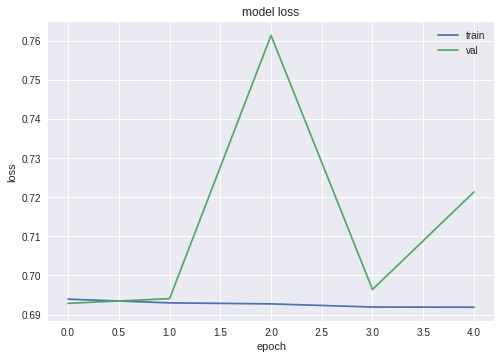

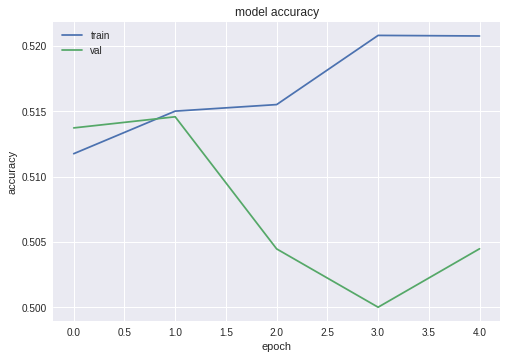

In [23]:
# PLOT
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.figure()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# BAD PLOTS 5 epoch not enough and different models should be tried. more time needed.

# TEST

In [0]:
# UNCOMMENT IF YOU WANT TO USE BEST WEGHT THAT WORKED WITH VALIDATION
#model.load_weights(fp)

In [24]:
pred = model.predict(np.array(X_test))
pred

array([[0.3836675 , 0.6163325 ],
       [0.37029028, 0.6297097 ],
       [0.36404863, 0.63595134],
       ...,
       [0.37455106, 0.62544894],
       [0.36581534, 0.63418466],
       [0.36840826, 0.63159174]], dtype=float32)

In [25]:
model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE)

50000/50000 [==============================] - 14s 272us/sample - loss: 0.7183 - categorical_accuracy: 0.5121


[0.7183356189727783, 0.51208]